In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', 999)

In [2]:
df= pd.read_excel("./data/online_retail_II.xlsx", sheet_name= 0)

In [3]:
df.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [5]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


In [6]:
df.tail(20)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
525441,538171,22837,HOT WATER BOTTLE BABUSHKA,2,2010-12-09 20:01:00,4.65,17530.00,United Kingdom
525442,538171,85152,HAND OVER THE CHOCOLATE SIGN,3,2010-12-09 20:01:00,2.10,17530.00,United Kingdom
525443,538171,21329,DINOSAURS WRITING SET,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
525444,538171,21327,SKULLS WRITING SET,2,2010-12-09 20:01:00,1.65,17530.00,United Kingdom
525445,538171,22666,RECIPE BOX PANTRY YELLOW DESIGN,1,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525446,538171,22154,ANGEL DECORATION 3 BUTTONS,48,2010-12-09 20:01:00,0.42,17530.00,United Kingdom
525447,538171,21875,KINGS CHOICE MUG,2,2010-12-09 20:01:00,1.25,17530.00,United Kingdom
525448,538171,21871,SAVE THE PLANET MUG,2,2010-12-09 20:01:00,1.25,17530.00,United Kingdom
525449,538171,21877,HOME SWEET HOME MUG,2,2010-12-09 20:01:00,1.25,17530.00,United Kingdom
525450,538171,22747,POPPY'S PLAYHOUSE BATHROOM,2,2010-12-09 20:01:00,2.10,17530.00,United Kingdom


In [7]:
df["Invoice"] =df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==False]


   


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [8]:
df["Invoice"].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [9]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


In [10]:
df["StockCode"] = df["StockCode"]. astype("str")
df[df["StockCode"].str.match("^\\d{5}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


In [11]:
df["StockCode"].str.replace("[0-9]","", regex=True).unique()



array(['', 'P', 'W', 'C', 'B', 'F', 'L', 'S', 'A', 'N', 'POST', 'E', 'J',
       'D', 'G', 'LP', 'BL', 'K', 'H', 'GR', 'M', 'DCGS', 'DOT', 'U', 'b',
       'w', 'c', 'a', 'f', 'bl', 's', 'p', 'R', 'V', 'T', 'I',
       'BANK CHARGES', 'O', 'Z', 'TEST', 'gift__', 'DCGSN', 'm', 'PADS',
       'Y', 'HC', 'e', 'd', 'ADJUST', 'DCGSSGIRL', 'GIFT', 'DCGSLBOY',
       'k', 'g', 'DCGSSBOY', 'DCGSLGIRL', 'j', 'l', 'n', 'J ', 'SP',
       'AMAZONFEE'], dtype=object)

In [12]:
df[df["StockCode"].str.match("TEST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.00,United Kingdom
39398,492718,TEST001,This is a test product.,5,2009-12-18 10:47:00,4.50,12346.00,United Kingdom
39411,492722,TEST002,This is a test product.,1,2009-12-18 10:55:00,1.00,12346.00,United Kingdom
44614,493294,TEST002,NaN,1,2009-12-22 15:15:00,0.00,NaN,United Kingdom
45228,493410,TEST001,This is a test product.,5,2010-01-04 09:24:00,4.50,12346.00,United Kingdom
45230,493412,TEST001,This is a test product.,5,2010-01-04 09:53:00,4.50,12346.00,United Kingdom
56117,494450,TEST001,This is a test product.,5,2010-01-14 13:50:00,4.50,12346.00,United Kingdom
66084,495295,TEST001,This is a test product.,5,2010-01-22 13:30:00,4.50,12346.00,United Kingdom


In [13]:
cleaned_df = df.copy() 



In [14]:
cleaned_df["Invoice"] = cleaned_df["Invoice"].astype("str")

mask = (
    cleaned_df["Invoice"].str.match("^//d{6}$")
)
cleaned_df[mask]



,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country


In [15]:
cleaned_df["StockCode"] = cleaned_df["StockCode"].astype("str")

mask = (
    (cleaned_df["StockCode"].str.match("^\\d{5}$")==True) 
    |(cleaned_df["StockCode"].str.match("^//d{5}[a-zA-Z]+$")==True)
    |(cleaned_df["StockCode"].str.contains("^PADS")==True)
)

cleaned_df = cleaned_df[mask]

cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,445364.00,445364,445364.00,358808.00
mean,10.62,2010-07-03 04:31:05.710969088,3.39,15352.56
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-26 14:45:00,1.25,13979.00
50%,3.00,2010-07-14 16:04:00,2.10,15311.00
75%,12.00,2010-10-18 13:18:00,4.21,16794.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,111.96,NaN,5.35,1679.47


In [16]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,445364.00,445364,445364.00,358808.00
mean,10.62,2010-07-03 04:31:05.710969088,3.39,15352.56
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-26 14:45:00,1.25,13979.00
50%,3.00,2010-07-14 16:04:00,2.10,15311.00
75%,12.00,2010-10-18 13:18:00,4.21,16794.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,111.96,NaN,5.35,1679.47


In [17]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

In [18]:
cleaned_df = cleaned_df[cleaned_df["Price"]>0]


In [19]:
cleaned_df = cleaned_df[cleaned_df["Quantity"]>0]



In [20]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,350916.00,350916,350916.00,350916.00
mean,13.70,2010-07-05 17:14:15.798311168,2.98,15360.35
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-31 17:29:00,1.25,13985.00
50%,5.00,2010-07-18 13:42:00,1.95,15311.00
75%,12.00,2010-10-17 14:26:00,3.75,16797.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,100.08,NaN,4.42,1678.16


In [21]:
cleaned_df["Price"].min()

np.float64(0.001)

In [22]:
len(cleaned_df)/len(df)

0.667825014606222

Dropped approx 35% data

In [23]:
cleaned_df["SalesLineTotal"] = cleaned_df["Quantity"] * cleaned_df["Price"]

cleaned_df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom,39.60
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [24]:
aggregated_df = cleaned_df.groupby(by="Customer ID", as_index=False)\
.agg(
    MonetaryValue=("SalesLineTotal","sum"),
    Frequency= ("Invoice","nunique"),
    LastInvoiceDate=("InvoiceDate","max")
)
aggregated_df.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,144.02,2,2010-06-28 13:53:00
1,12347.00,966.87,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,1946.64,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [25]:
max_invoice_date = cleaned_df["InvoiceDate"].max()

max_invoice_date

Timestamp('2010-12-09 20:01:00')

In [26]:
aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,144.02,2,2010-06-28 13:53:00,164
1,12347.00,966.87,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,1946.64,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


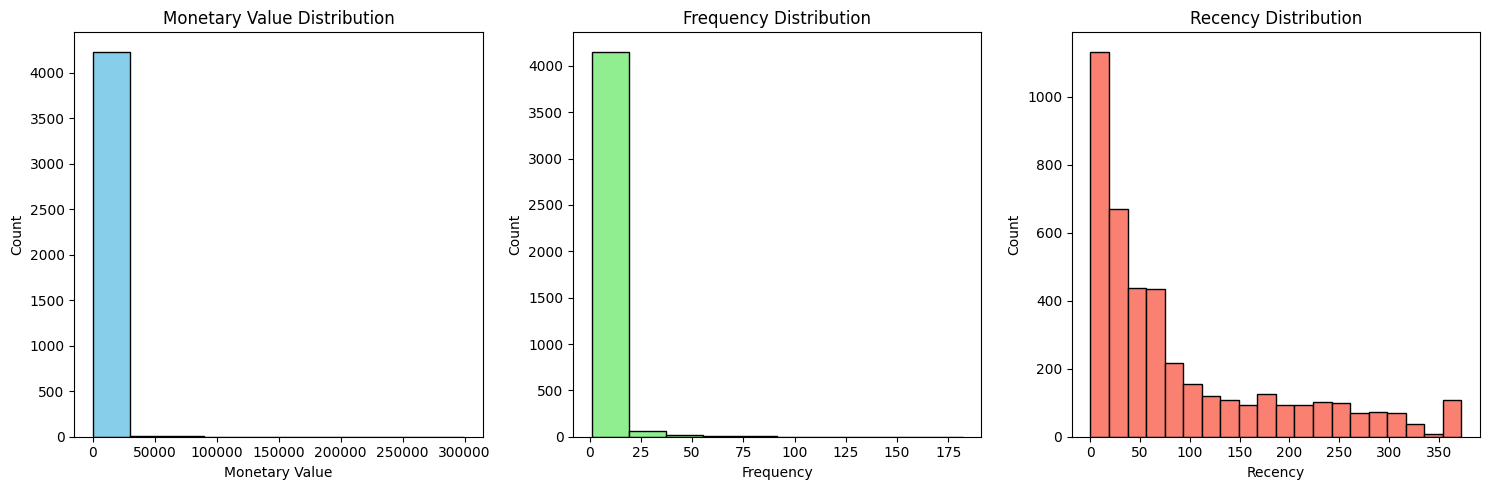

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')


plt.subplot(1,3,2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')


plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins=20, color= 'salmon', edgecolor= 'black')
plt.title('Recency Distribution') 
plt.xlabel('Recency')
plt.ylabel('Count')


plt.tight_layout()
plt.show()





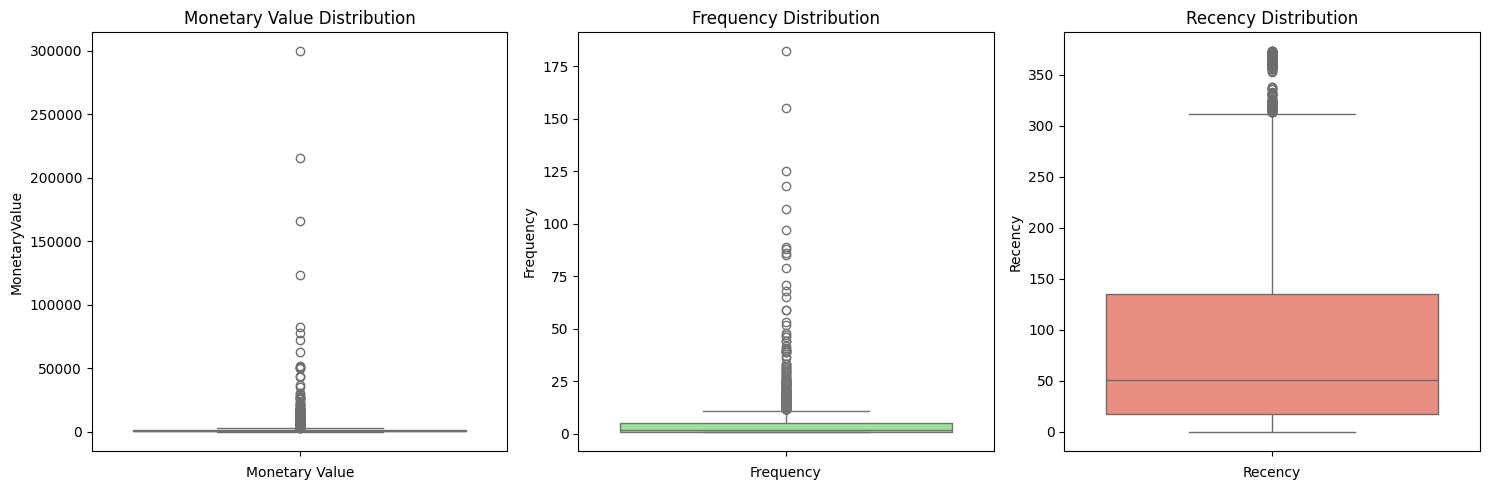

In [28]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')


plt.subplot(1,3,2)
sns.boxplot(aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')


plt.subplot(1,3,3)
sns.boxplot(aggregated_df["Recency"], color= 'salmon')
plt.title('Recency Distribution') 
plt.xlabel('Recency')


plt.tight_layout()
plt.show()

In [29]:
M_Q1 = aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3 = aggregated_df["MonetaryValue"].quantile(0.75)
IQR = M_Q3 - M_Q1
IQR

monetary_value_outliers_df = aggregated_df[(aggregated_df["MonetaryValue"]> (M_Q3 + 1.5 *IQR))|(aggregated_df["MonetaryValue"]< (M_Q1 -1.5*IQR))].copy()
monetary_value_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,412.00,412.00,412.00,412,412.00
mean,15083.30,10433.19,17.03,2010-11-10 21:01:28.106796032,28.67
min,12357.00,3308.90,1.00,2009-12-10 18:03:00,0.00
25%,13561.75,3957.30,8.00,2010-11-08 13:45:45,3.00
50%,14956.50,5389.85,12.00,2010-11-26 15:03:30,13.00
75%,16653.00,8847.18,18.00,2010-12-06 12:47:30,31.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,364.00
std,1733.82,22291.55,19.38,NaN,49.15


In [30]:
M_Q1 = aggregated_df["Frequency"].quantile(0.25)
M_Q3 = aggregated_df["Frequency"].quantile(0.75)
IQR = M_Q3 - M_Q1
IQR

frequency_outliers_df = aggregated_df[(aggregated_df["Frequency"]> (M_Q3 + 1.5 *IQR))|(aggregated_df["Frequency"]< (M_Q1 -1.5*IQR))].copy()
frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,269.00,269.00,269.00,269,269.00
mean,15392.80,12298.98,23.70,2010-11-23 16:23:39.033456896,15.87
min,12437.00,898.14,12.00,2010-05-12 16:51:00,0.00
25%,13831.00,3638.01,13.00,2010-11-21 10:38:00,2.00
50%,15527.00,5572.67,17.00,2010-12-02 12:09:00,7.00
75%,16883.00,10269.46,24.00,2010-12-07 12:43:00,18.00
max,18260.00,299485.80,182.00,2010-12-09 19:32:00,211.00
std,1748.38,27198.75,21.58,NaN,26.79


In [31]:
non_outlier_df = aggregated_df[(~aggregated_df.index.isin(monetary_value_outliers_df.index))& (~aggregated_df.index.isin(frequency_outliers_df.index))]
non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3785.00,3785.00,3785.00,3785,3785.00
mean,15372.18,773.15,2.86,2010-09-03 14:28:03.788639232,96.95
min,12346.00,2.95,1.00,2009-12-01 12:55:00,0.00
25%,13909.00,236.40,1.00,2010-07-08 16:56:00,22.00
50%,15379.00,508.57,2.00,2010-10-12 17:17:00,58.00
75%,16847.00,1115.97,4.00,2010-11-17 13:42:00,154.00
max,18287.00,3298.60,11.00,2010-12-09 20:01:00,373.00
std,1691.82,714.34,2.23,NaN,98.12


In [32]:
non_outlier_df = non_outlier_df[non_outlier_df["MonetaryValue"]> 0]
non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3785.00,3785.00,3785.00,3785,3785.00
mean,15372.18,773.15,2.86,2010-09-03 14:28:03.788639232,96.95
min,12346.00,2.95,1.00,2009-12-01 12:55:00,0.00
25%,13909.00,236.40,1.00,2010-07-08 16:56:00,22.00
50%,15379.00,508.57,2.00,2010-10-12 17:17:00,58.00
75%,16847.00,1115.97,4.00,2010-11-17 13:42:00,154.00
max,18287.00,3298.60,11.00,2010-12-09 20:01:00,373.00
std,1691.82,714.34,2.23,NaN,98.12


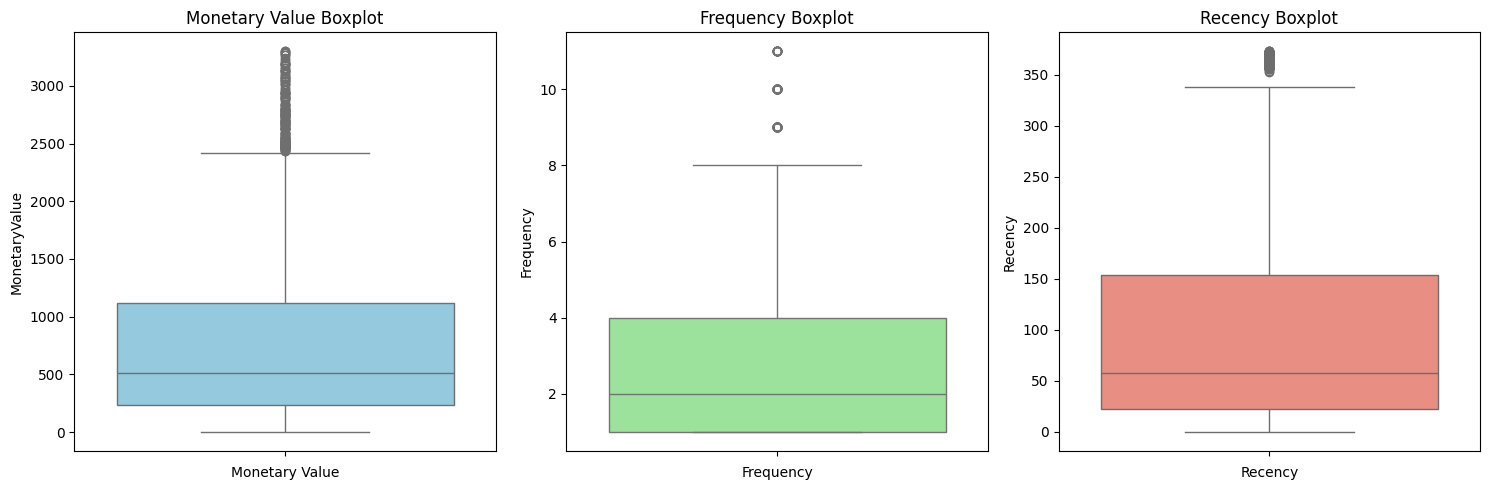

In [33]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outlier_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')


plt.subplot(1,3,2)
sns.boxplot(data=non_outlier_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')


plt.subplot(1,3,3)
sns.boxplot(data=non_outlier_df['Recency'], color='salmon')
plt.title('Recency Boxplot') 
plt.xlabel('Recency')


plt.tight_layout()
plt.show()

In [34]:
non_outlier_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3785.00,3785.00,3785.00,3785,3785.00
mean,15372.18,773.15,2.86,2010-09-03 14:28:03.788639232,96.95
min,12346.00,2.95,1.00,2009-12-01 12:55:00,0.00
25%,13909.00,236.40,1.00,2010-07-08 16:56:00,22.00
50%,15379.00,508.57,2.00,2010-10-12 17:17:00,58.00
75%,16847.00,1115.97,4.00,2010-11-17 13:42:00,154.00
max,18287.00,3298.60,11.00,2010-12-09 20:01:00,373.00
std,1691.82,714.34,2.23,NaN,98.12


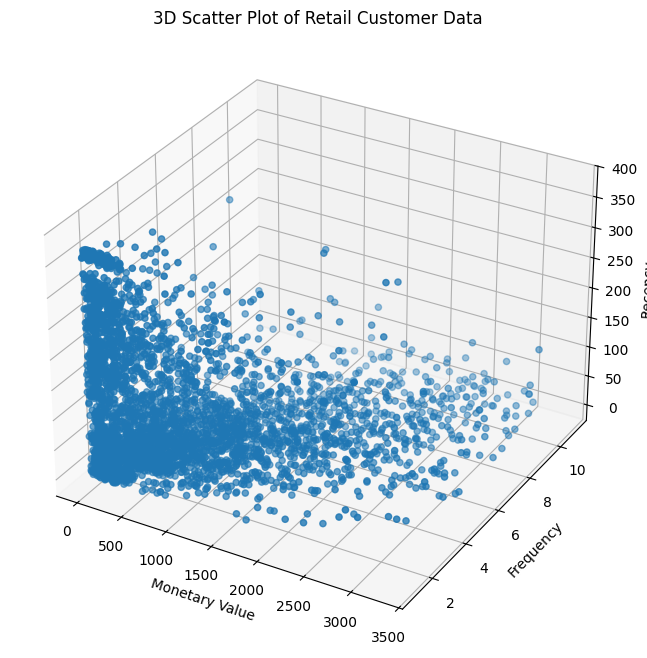

In [35]:
fig = plt.figure(figsize=(8,8))


ax = fig.add_subplot(projection = "3d")

scatter = ax.scatter(non_outlier_df["MonetaryValue"], non_outlier_df["Frequency"], non_outlier_df["Recency"])


ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")


ax.set_title("3D Scatter Plot of Retail Customer Data")


plt.show()



In [36]:
scaler = StandardScaler()


scaled_data_df = scaler.fit_transform(non_outlier_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data_df

array([[-0.88083728, -0.3837042 ,  0.68341659],
       [ 0.27122348, -0.3837042 , -0.96777989],
       [-0.77283465, -0.83167471, -0.24410736],
       ...,
       [-0.57690661, -0.83167471,  2.01864337],
       [ 0.24522388, -0.3837042 ,  0.14321033],
       [ 1.07896109,  0.51223682, -0.81489133]], shape=(3785, 3))

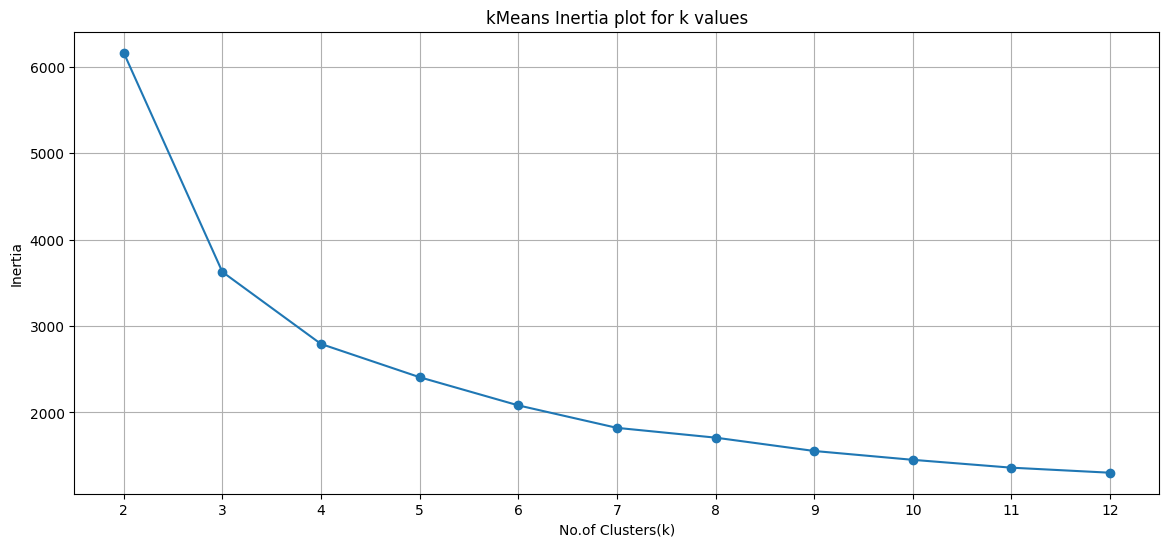

In [37]:
max_k = 12


inertia = []
silhouette_scores = []
k_values = range(2, max_k+1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhouette_scores.append(sil_score)

    inertia.append(kmeans.inertia_)


plt.figure(figsize=(14,6))

plt.plot(k_values, inertia, marker = 'o')
plt.title('kMeans Inertia plot for k values')
plt.xlabel('No.of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)


plt.show()

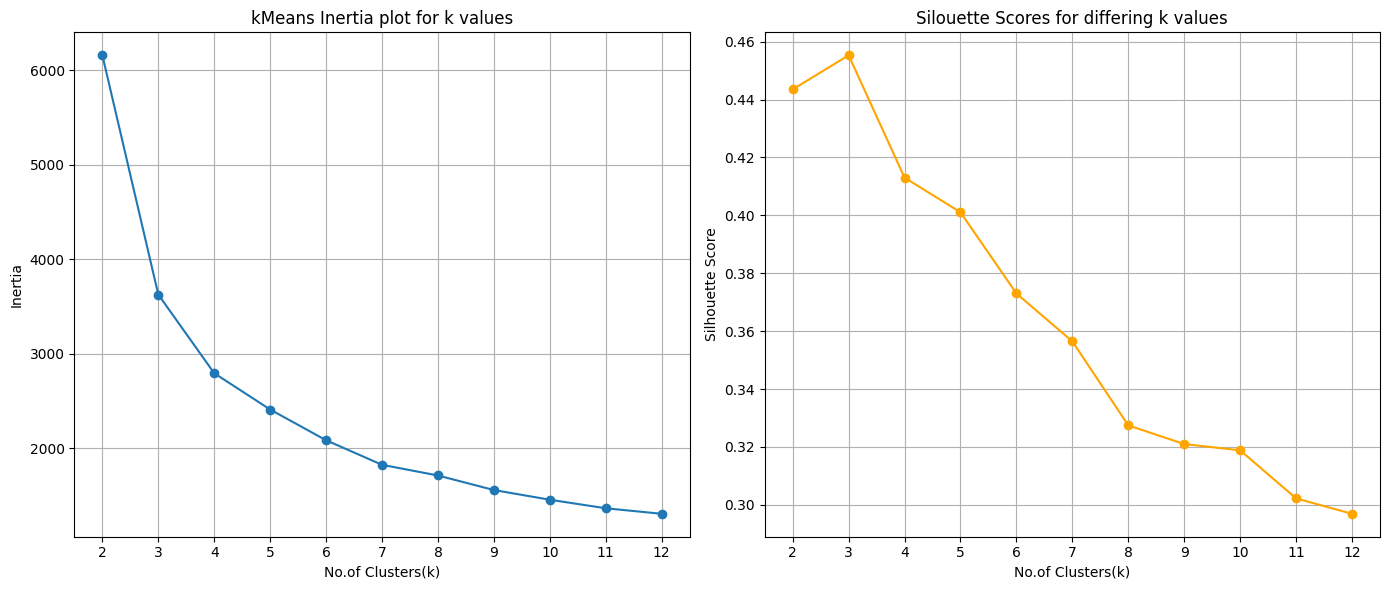

In [38]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.plot(k_values, inertia, marker = 'o')
plt.title('kMeans Inertia plot for k values')
plt.xlabel('No.of Clusters(k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(k_values, silhouette_scores, marker = 'o' , color = 'orange')
plt.title('Silouette Scores for differing k values')
plt.xlabel('No.of Clusters(k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)


cluster_labels = kmeans.fit_predict(scaled_data_df)


In [40]:
non_outlier_df["Cluster"] = cluster_labels

non_outlier_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,144.02,2,2010-06-28 13:53:00,164,0
1,12347.00,966.87,2,2010-12-07 14:57:00,2,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,1946.64,2,2010-10-28 08:23:00,42,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4243,18283.00,563.19,6,2010-11-22 15:30:00,17,1
4244,18284.00,391.28,1,2010-10-04 11:33:00,66,2
4245,18285.00,361.10,1,2010-02-17 10:24:00,295,0
4246,18286.00,948.30,2,2010-08-20 11:57:00,111,2


<function matplotlib.pyplot.show(close=None, block=None)>

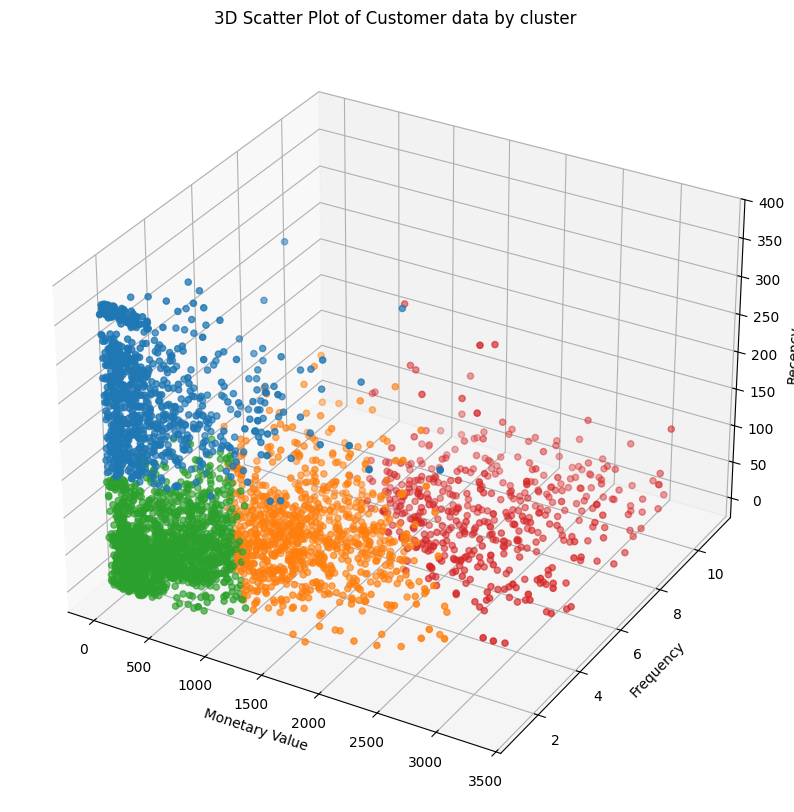

In [41]:
cluster_colors ={0: '#1f77b4',
                 1: '#ff7f0e',
                 2: '#2ca02c',
                 3:  '#d62728'}

colors = non_outlier_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(10,10))
ax =fig.add_subplot(projection='3d')


scatter = ax.scatter(non_outlier_df['MonetaryValue'],
                      non_outlier_df['Frequency'],
                        non_outlier_df['Recency'],
                        c = colors,
                        marker = 'o')


ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer data by cluster')

plt.show

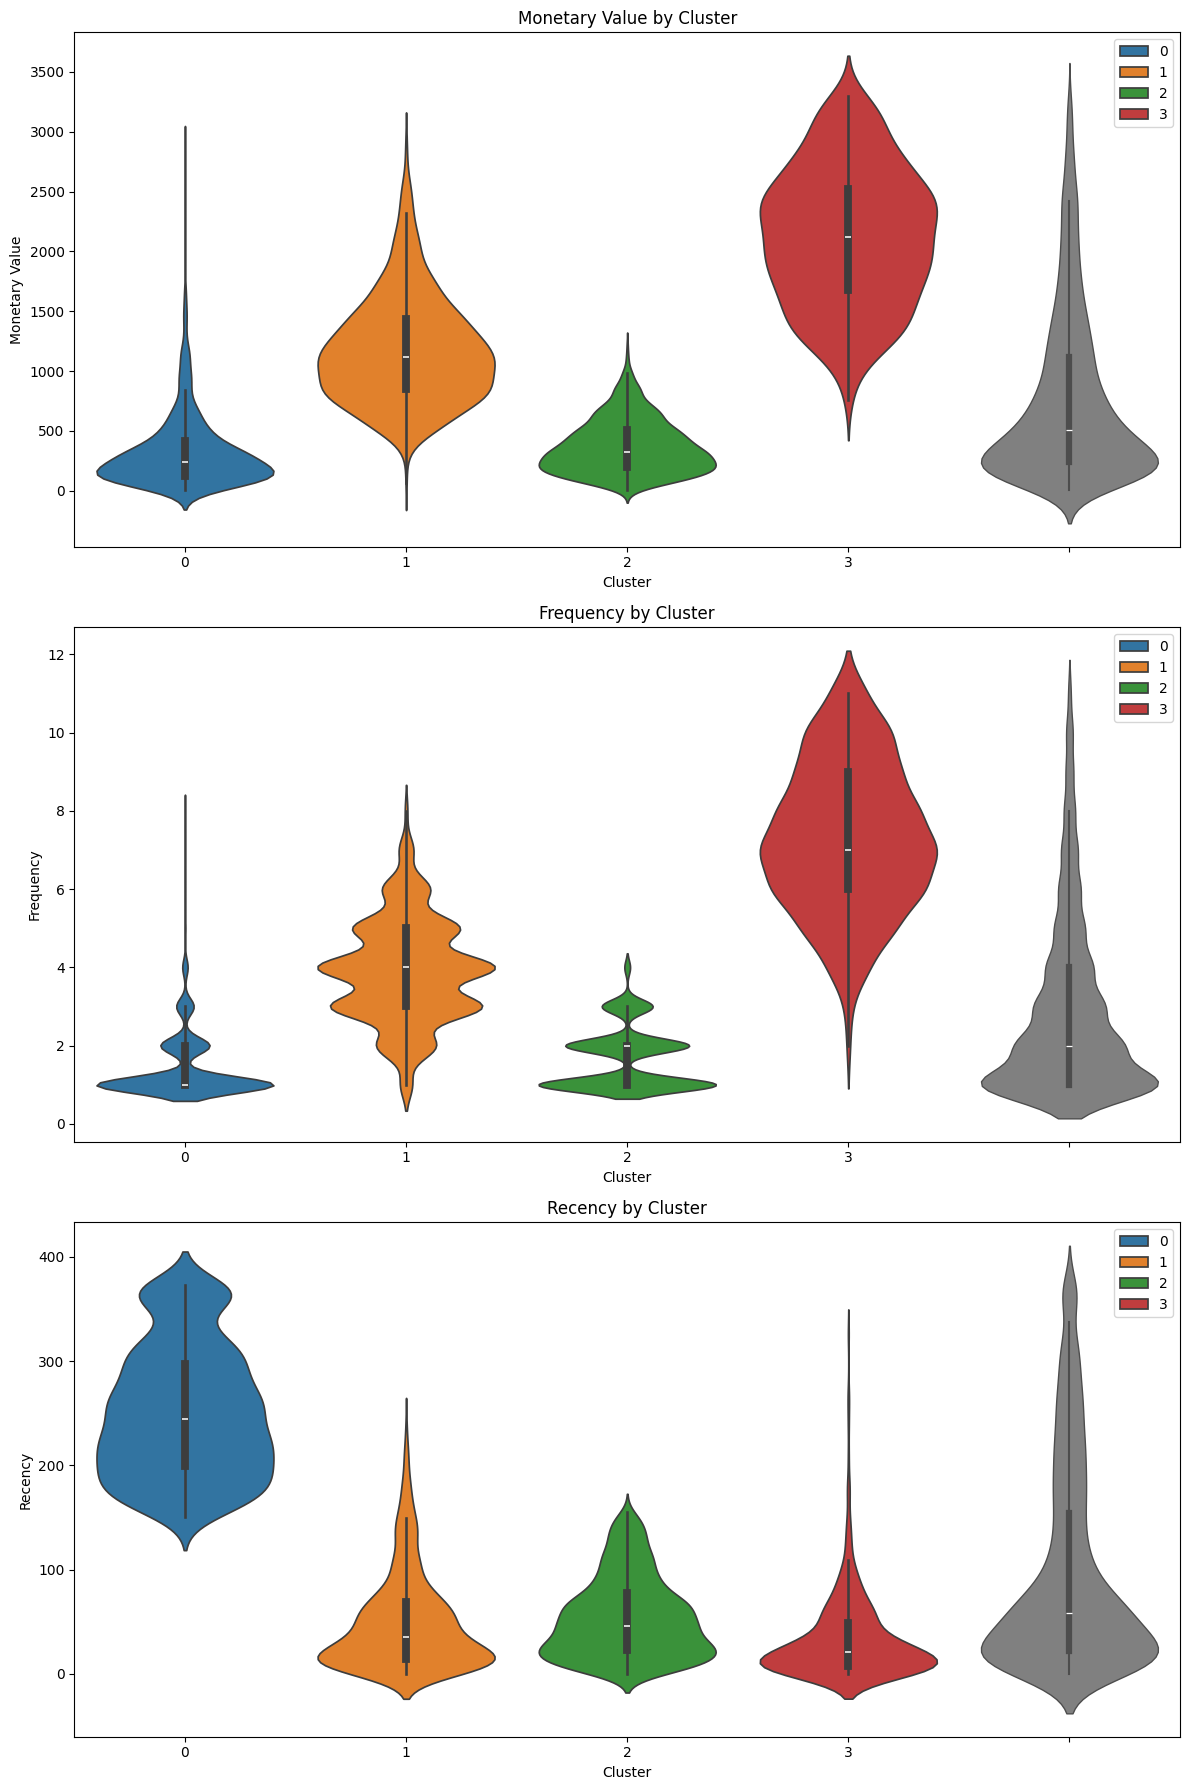

In [42]:

plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outlier_df['Cluster'],y=non_outlier_df['MonetaryValue'],palette=cluster_colors,hue=non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['MonetaryValue'], color='gray',linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3,1,2)
sns.violinplot(x=non_outlier_df['Cluster'],y=non_outlier_df['Frequency'],palette=cluster_colors,hue=non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['Frequency'], color='gray',linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')

plt.subplot(3,1,3)
sns.violinplot(x=non_outlier_df['Cluster'],y=non_outlier_df['Recency'],palette=cluster_colors,hue=non_outlier_df['Cluster'])
sns.violinplot(y=non_outlier_df['Recency'], color='gray',linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()

Cluster Labelling

Cluster 0 (Blue): Loyal Customers
Implement loyalty rewards and dicounts and regular engage to stay top of mind.

Cluster 1 (Orange): Losing Customer
Re-engage and insentivize to come back(with i.e special discounts)

Cluster 2 (Green): New potential customer
Nuture, ensure excellent customer service, build relationship

Cluster 3 (Red) Most loyal lifetime customers
Implement high loyalty program, top offers, first viewing of new products, look to make them ambassodors.